# Stock Predict

#### Author: Alex Yeung
##### Purpose: Collection of methods to predict stock price

In [1]:
# Import
import yfinance as yf

#import quandl as qd
#qd.ApiConfig.api_key = 'jik5AH4ysY8eJY4ZpL-e'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# yf Get the data for the stock
tickers = ["MSFT"]
#Ticker Options
#tickers = ["MA","PYPL","PLAN","WORK"]

#Period Options
 # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max

yf_data_All = yf.download(tickers,period = "1y")
yf_data = yf.download(tickers,period = "3mo")
yf_data.count()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


Open         64
High         64
Low          64
Close        64
Adj Close    64
Volume       64
dtype: int64

In [28]:
yf_data.reset_index(level=0, inplace=True)
yf_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-08,184.98,185.00,183.36,184.68,184.17,30912600
1,2020-05-11,183.15,187.51,182.85,186.74,186.22,30809400
2,2020-05-12,186.80,187.04,182.30,182.51,182.00,32038200
3,2020-05-13,182.55,184.05,176.54,179.75,179.25,44711500
4,2020-05-14,177.54,180.69,175.68,180.53,180.03,41873900


In [29]:
yf_data.size

448

In [30]:
yf_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,64.000000,64.000000,64.000000,64.000000,64.000000,6.400000e+01
mean,196.807656,199.155938,194.358125,197.082813,197.019219,3.554376e+07
std,11.588960,11.574098,11.239448,11.494057,11.572717,1.045756e+07
min,177.540000,180.690000,175.680000,179.750000,179.250000,1.963260e+07
25%,185.017500,186.947500,183.457500,185.247500,185.247500,2.926672e+07
50%,197.840000,200.250000,195.055000,198.140000,198.140000,3.279455e+07
75%,205.792500,209.367500,202.485000,206.462500,206.462500,3.984365e+07
max,216.330000,217.640000,211.570000,216.540000,216.540000,7.898300e+07


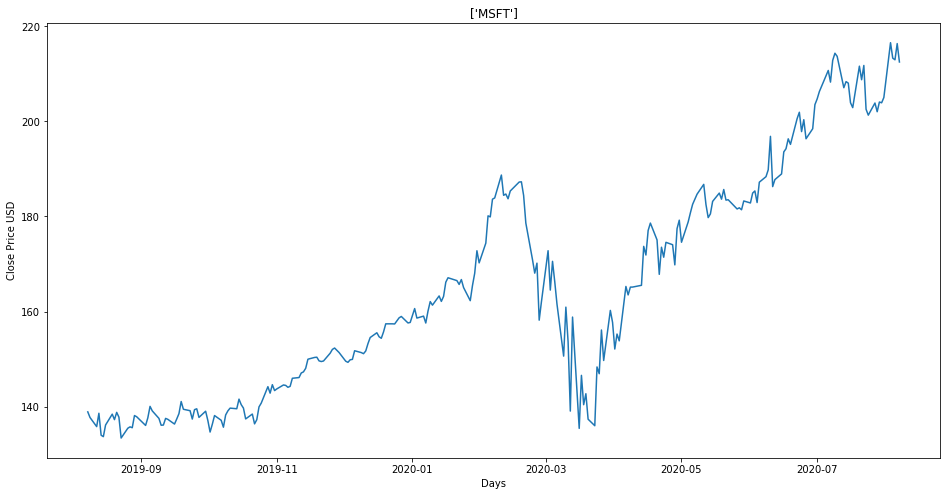

In [31]:
plt.figure(figsize=(16,8))
plt.title(tickers)
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(yf_data_All['Close'])
plt.show()

# Training Test data split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
future_days = 5

In [34]:
df_1 = yf_data[['Close']]
df_1['Prediction'] = df_1[['Close']].shift(-future_days)

C:\Users\ayeun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
df_1.shape

(64, 2)

In [41]:
x = np.array(df_1[['Close']])[:-future_days]

In [40]:
y = np.array(df_1[['Prediction']])[:-future_days]

In [42]:
print("X Shape: " + str(x.shape) + ", Y Shape: " + str(y.shape))

X Shape: (59, 1), Y Shape: (59, 1)


In [43]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [45]:
df_1.columns

Index(['Close', 'Prediction'], dtype='object')

In [46]:
x_predict = df_1.drop(['Prediction'],1)[:-future_days]
x_predict = x_predict.tail(future_days)
x_predict = np.array(x_predict)

In [47]:
x_predict.shape

(5, 1)

In [48]:
y_true = df_1.drop(['Close'],1)[:-future_days]
y_true = y_true.tail(future_days)
y_true = np.array(y_true)
y_true.shape

(5, 1)

# Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression().fit(x_train, y_train)

In [51]:
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.8362495332987704


In [52]:
# The coefficients
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [[0.87919044]]
Intercept:  [26.31216378]


In [53]:
from sklearn.metrics import r2_score
y_hat = lr.predict(x_predict)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_true)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_true) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y_true) )

Mean absolute error: 8.86
Residual sum of squares (MSE): 82.41
R2-score: -112.24


C:\Users\ayeun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


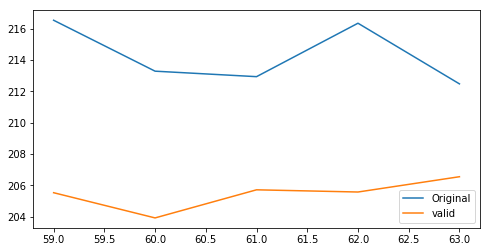

In [54]:
predictions = y_hat

valid = yf_data[x.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(8,4))
#plt.plot(yf_data[['Close']])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Original','valid','predict'])
plt.show()

# DecisionTreeRegressor

In [55]:
from sklearn.tree import  DecisionTreeRegressor

In [56]:
d_tree = DecisionTreeRegressor().fit(x_train, y_train)

In [57]:
tree_confidence = d_tree.score(x_test, y_test)
print("tree confidence: ", tree_confidence)

tree confidence:  0.776638593477611


In [58]:
y_hat_dtree = d_tree.predict(x_predict)

In [59]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat_dtree - y_true)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat_dtree - y_true) ** 2))
print("R2-score: %.2f" % r2_score(y_hat_dtree , y_true) )

Mean absolute error: 1.84
Residual sum of squares (MSE): 6.16
R2-score: 1.00


C:\Users\ayeun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


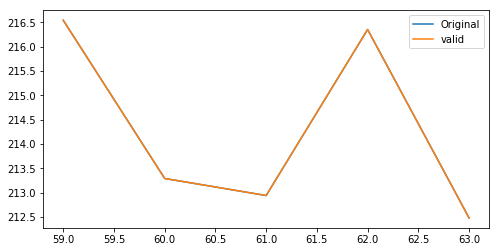

In [60]:
predictions = y_hat_dtree

valid = yf_data[x.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(8,4))
#plt.plot(yf_data[['Close']])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Original','valid','predict'])
plt.show()

# SVM

In [61]:
from sklearn.svm import SVR

In [62]:
# kernel options: rbf, linear, polynomial, sigmoid
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train.ravel())

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [63]:
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.6219894360589517


In [66]:
svm_y_hat = svr_rbf.predict(x_predict)


C:\Users\ayeun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


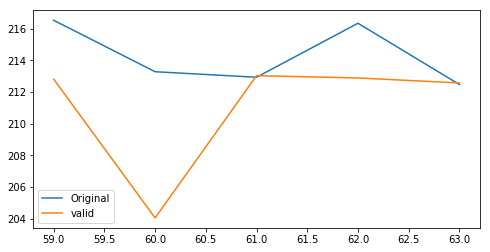

In [67]:
predictions = svm_y_hat

valid = yf_data[x.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(8,4))
#plt.plot(yf_data[['Close']])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Original','valid','predict'])
plt.show()

# Use FB Prophet Model

In [ ]:
data_fb_prophet = yf_data[["Date","Close"]]

In [ ]:
pip install --upgrade setuptools
!conda install gcc
!conda install -c conda-forge fbprophet

In [ ]:
!pip install pystan

In [ ]:
!conda install libpython m2w64-toolchain -c msys2

In [ ]:
!pip install fbprophet

In [ ]:
import sys

!{sys.executable} -m pip install fbprophet 
from fbprophet import Prophet

In [ ]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data_fb_prophet) # fit the model using all data

# Other

In [ ]:


#from sklearn.svm import SVR
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
# Code for Quandl API - NYSE data discontinued
#%matplotlib inline
#data = qd.get('XNYS'/MA', start_date="2018-12-31", end_date="2019-09-10")
#data.tail()

# Summary

# Plotting